In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [69]:
n = 21
x = np.linspace(0, 20, n)
w = np.array([-1.5, 1.0 / 9])
y = w[0] * x + w[1] * x ** 2 + stats.norm.rvs(size = n) * 2

In [70]:
def recursive_mean(n, x, xbar):
    return x if xbar == None else (xbar + (x - xbar) / (n + 1.0))

def recursive_var(n, x, xbar, xbar_next, cxx):
    if cxx == None:
        return 0
    else:
        return ((x ** 2 + n * cxx + n * xbar ** 2 - (n + 1) * xbar_next ** 2) / (n + 1.0))

def recursive_cov(n, x, xbar, xbar_next, y, ybar, ybar_next, cxy):
    if cxy == None:
        return 0
    else:
        return ((x * y + n * cxy + n * xbar * ybar - (n + 1) * xbar_next * ybar_next) / (n + 1.0))
    
def regress(n, xbar, ybar, cxx, cxy, x, y):    
    xbar_next = recursive_mean(n, x, xbar)
    ybar_next = recursive_mean(n, y, ybar)
    cxx = recursive_var(n, x, xbar, xbar_next, cxx)
    cxy = recursive_cov(n, x, xbar, xbar_next, y, ybar, ybar_next, cxy)
    xbar = xbar_next
    ybar = ybar_next
    w1 = 0 if cxx == 0 else (1.0 * cxy / cxx)
    w0 = ybar - w1 * xbar
    return w0, w1, xbar, ybar, cxx, cxy 

[-1.5         0.11111111]
-8.59339117206 0.831019703528


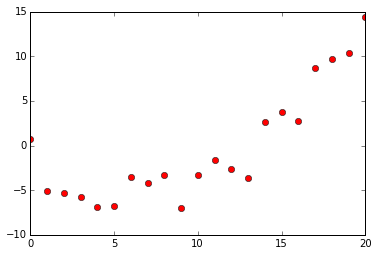

In [71]:
xbar = None
ybar = None
cxx = None
cxy = None

for n in range(len(x)):
    w0, w1, xbar, ybar, cxx, cxy = regress(n, xbar, ybar, cxx, cxy, x[n], y[n])

print w
print w0, w1

plt.plot(x, y, 'ro')
plt.show()